# Vectorized chi-square test

I have a multi dimensional parameter chi squared minimization to do.
I want to figure out how much vectorization I can use to simplify and speed up the processing.

In [3]:
import numpy as np
from scipy.stats import chisquare

In [183]:
x, y = np.array([5, 4, 6, 7]), np.array([5.1, 3.8, 6.1, 7])
chisquare(x, y)


Power_divergenceResult(statistic=0.01412644436549425, pvalue=0.99955533972334498)

In [10]:
def chisqr(x, y):
    return np.sum((x - y)**2 / y )

chisqr(x, y)

0.46785714285714286

The scipy.stats.chisquare value is the same as the manual chisqr above.

In [45]:
z = np.array([[1, 1]]).T
print(z)
print(z.T)
X = z * x
XX = x * z
print(X)
print(XX)
model = np.array([[1,2,3,4,5,6,7]])
model.T * XX.T
Y = y * z
chisquare(X,Y)

[[1]
 [1]]
[[1 1]]
[[5 4 6 7]
 [5 4 6 7]]
[[5 4 6 7]
 [5 4 6 7]]


ValueError: operands could not be broadcast together with shapes (7,1) (4,2) 

In [96]:

pix = np.arange(1, 1000)
alpha = np.arange(1, 9, 0.3)

broad = pix[:, np.newaxis] * alpha

c = chisquare(4*pix[:, np.newaxis], broad)
c.statistic

array([ 4495500.        ,  2801042.30769231,  1798200.        ,
        1159365.78947368,   735627.27272727,   449550.        ,
         256885.71428571,   130514.51612903,    52888.23529412,
          12150.        ,        0.        ,    10454.65116279,
          39091.30434783,    82570.40816327,   138323.07692308,
         204340.90909091,   279031.03448276,   361113.93442623,
         449550.        ,   543485.82089552,   642214.28571429,
         745144.52054795,   851778.94736842,   961695.56962025,
        1074534.14634146,  1189985.29411765,  1307781.81818182])

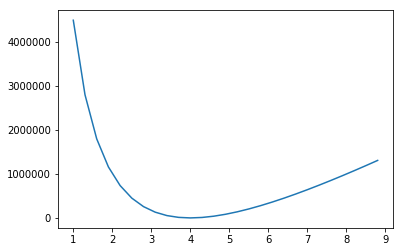

In [99]:
import matplotlib.pyplot as plt
plt.plot(alpha, c.statistic)
plt.show()

In [98]:
alpha[np.argmin(c.statistic)]

4.0

In [188]:
pix = np.arange(1, 10000)
alpha = np.linespace(1, 9, 500)
cc = np.empty_like(alpha)

AttributeError: module 'numpy' has no attribute 'linespace'

In [186]:
# Timing with he results
%time

broad = pix[:, np.newaxis] * alpha

c = chisquare(4*pix[:, np.newaxis], broad)
c.statistic


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.9 µs


array([  7.95208995e+08,   2.62418985e+08,   1.55868975e+08,
         1.10210394e+08,   8.48489550e+07,   6.87134905e+07,
         5.75458581e+07,   4.93589250e+07,   4.31006797e+07,
         3.81620629e+07,   3.41660379e+07,   3.08667111e+07,
         2.80968750e+07,   2.57388650e+07,   2.37074757e+07])

In [187]:
# Timing with broadcasting
% time
for i, a in enumerate(alpha):
    b = pix * a
    cc[i] = chisquare(pix, b)
cc

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.9 µs


NameError: name 'cc' is not defined

In [101]:
# Duel phoenix model:


In [135]:
x = np.random.rand(7)
y = np.random.rand(7)


obs = x + 0.1 * y

alpha = np.arange(0.01, 0.3, 0.02)
rv = 
print(alpha.shape)
print(y.shape)
yy = y * alpha[:, np.newaxis]

(15,)
(7,)


In [140]:
mod = x + yy
a = (obs - mod)**2 / yy

In [146]:
a
alpha[np.argmin(a.T)]

0.10999999999999997

In [148]:
b = chisquare(obs, yy)
chisqr = b.statistic
alpha[np.argmin(b.statistic)]

0.10999999999999997

In [149]:
This vectorizes one of the biggest inner steps.   alpha value and chisqure generation.



SyntaxError: invalid syntax (<ipython-input-149-9d4f1a020328>, line 1)

In [150]:
# Can I vectorize the doppler shift?

import PyAstronomy.pyasl as pyasl


In [180]:
wav = np.random.rand(1, 5)
flux = np.random.rand(4, 5)

v = np.random.rand(2,1)

a,b = pyasl.dopplerShift(wav, flux, v)

ValueError: x and y arrays must be equal in length along interpolation axis.